### Importing Essesntial Libraries

In [135]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
import pickle

### Data Reading

In [3]:
data = pd.read_csv("Creditcard_sampledata.csv")
data_1 = data.iloc[:,1:]

In [3]:
data_1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [4]:
data_1["Class"].value_counts()

0    4501
1     300
Name: Class, dtype: int64

In [5]:
data_1.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0


### Data Exploration - EDA

#### Univariate Analysis

In [6]:
# Desciptive Statistics
data_1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,...,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,-0.303624,0.211558,-0.429698,0.288811,-0.188252,-0.072468,-0.316504,0.045924,-0.148220,-0.347430,...,0.060589,0.005484,0.003032,-0.000025,-0.003047,0.011922,0.016084,0.003610,95.322779,0.062487
std,2.772626,2.174351,2.864098,1.885092,2.063708,1.412145,2.548749,2.013435,1.395856,2.162679,...,1.219818,0.806541,0.657677,0.599871,0.537092,0.484087,0.493590,0.289610,323.194742,0.242063
min,-30.552380,-42.172688,-31.103685,-5.047408,-28.815577,-8.389238,-43.557242,-41.044261,-13.320155,-24.588262,...,-22.797604,-8.887017,-17.530682,-2.822684,-4.547278,-1.577118,-7.263482,-3.916662,0.000000,0.000000
25%,-1.050683,-0.553656,-1.098495,-0.774454,-0.768291,-0.826600,-0.628745,-0.201625,-0.740480,-0.646340,...,-0.228758,-0.535430,-0.173715,-0.358423,-0.318537,-0.316932,-0.069364,-0.056061,5.000000,0.000000
50%,-0.118878,0.118692,0.057796,0.089791,-0.056748,-0.305158,0.026929,0.041631,-0.091472,-0.115890,...,-0.008564,0.017405,-0.014563,0.041115,0.011232,-0.033227,0.007949,0.012512,22.190000,0.000000
75%,1.284822,0.916618,0.992516,0.945936,0.625163,0.388610,0.559077,0.383919,0.575285,0.380728,...,0.214166,0.542830,0.148047,0.433521,0.351640,0.268913,0.116067,0.087857,77.050000,0.000000
max,2.446505,22.057729,3.757300,12.114672,12.791416,21.190194,26.249717,20.007208,8.141560,12.901627,...,27.202839,8.316275,11.466709,3.437028,2.679032,3.116200,5.058448,3.042406,12910.930000,1.000000


<AxesSubplot:xlabel='index', ylabel='Class'>

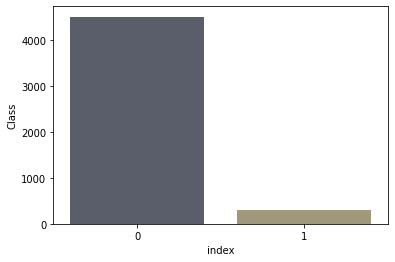

In [7]:
# Checking Whether data is imbalance or not
data_tar = data_1["Class"].value_counts().reset_index()
sns.barplot(x="index",y="Class",data=data_tar,palette="cividis")

In [8]:
# Checking Constant Variance columns
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data_1)
print("variables with 0 variance factor:",data_1.columns[var_thres.get_support()])

variables with 0 variance factor: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


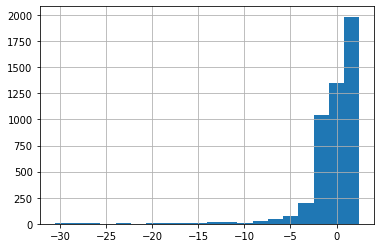

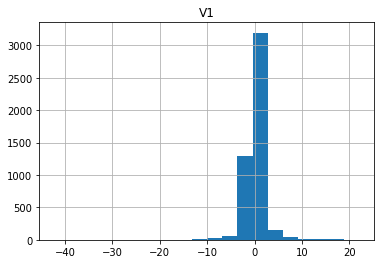

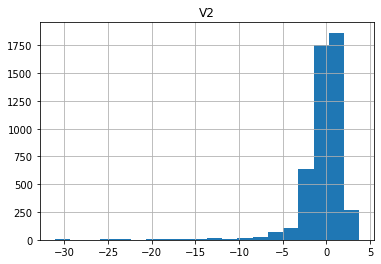

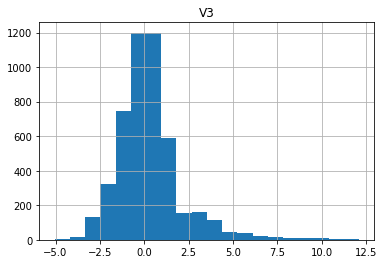

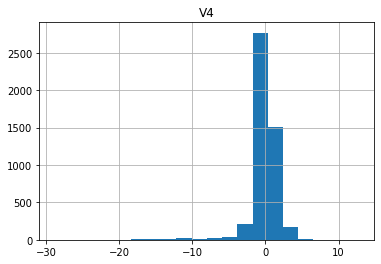

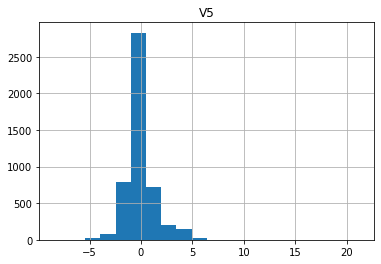

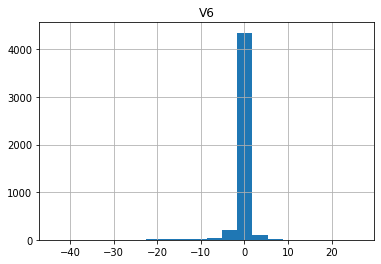

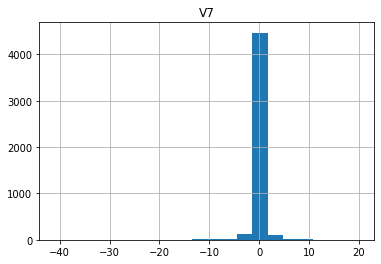

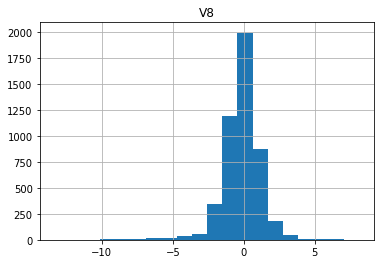

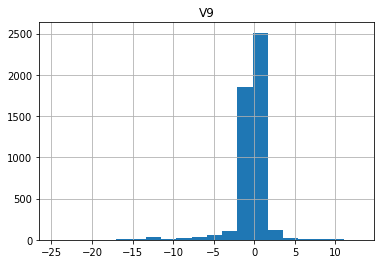

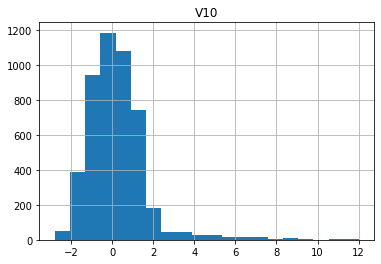

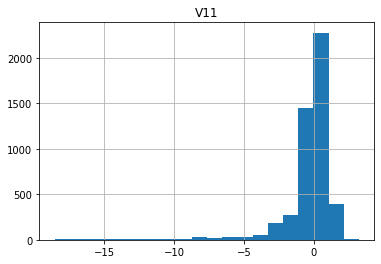

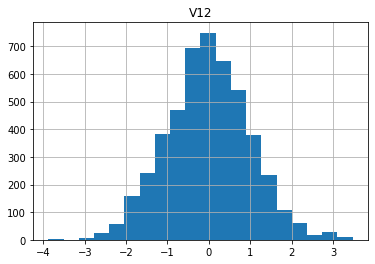

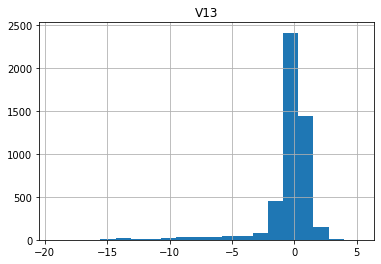

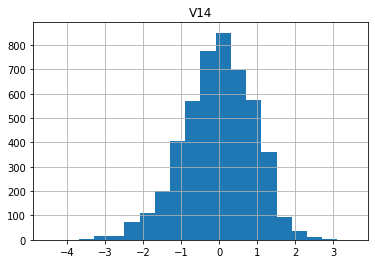

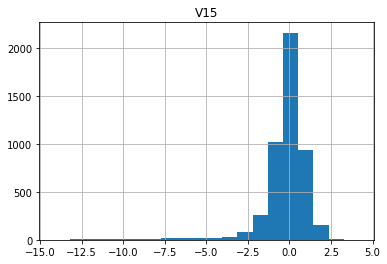

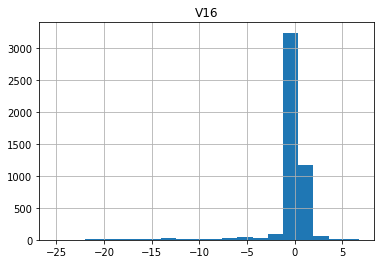

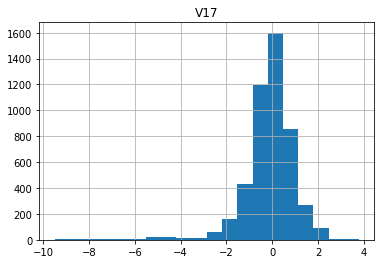

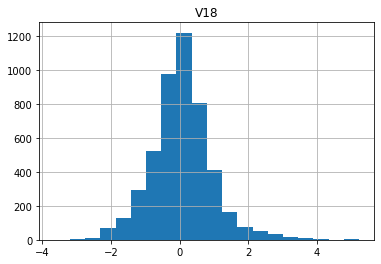

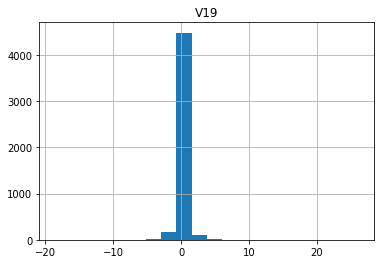

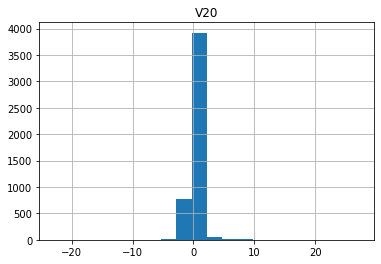

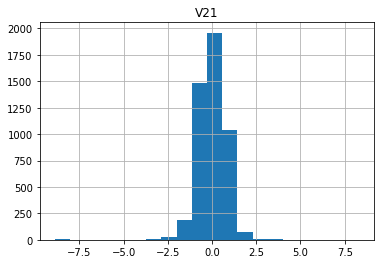

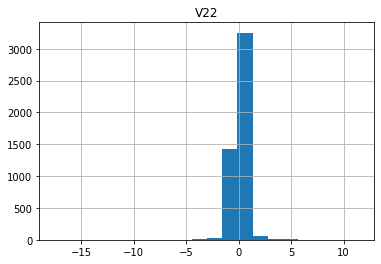

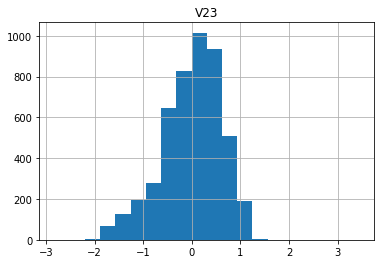

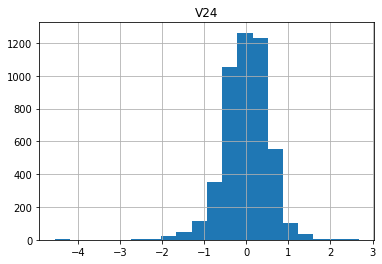

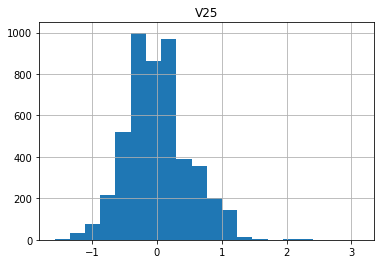

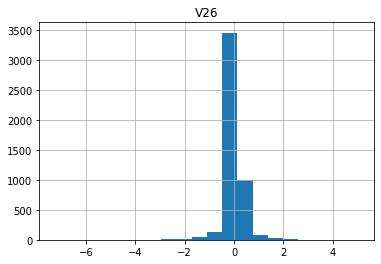

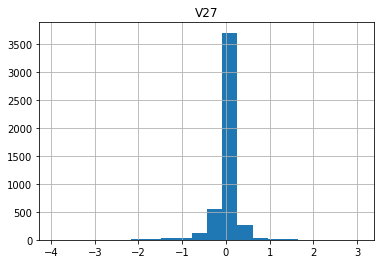

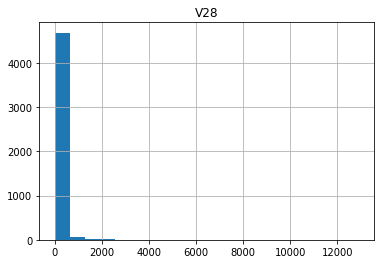

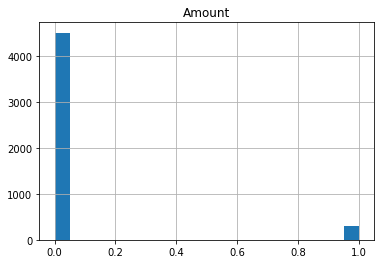

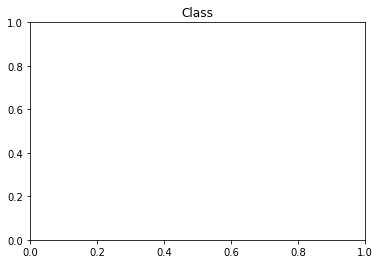

In [9]:
# Continuous Data Visualization
var = data_1.columns
def uni_cont(data,var):
    num_vars=[var for var in data_1.columns if data_1[var].dtypes != 'O']
    for var in num_vars:
        data[var].hist(bins=20)
        plt.show()
        plt.title(var)
uni_cont(data_1,var)

### Insights

* Data is Imbalance, need to make it balanced before training - **ACTION** 
* All features showed some variance factor in thier distribution. None of the variables are zero variance effected
* Features doesn’t not affect with any outliers. From distribution plots all data points are close each other
* Need to scale down **AMOUNT** variable - **ACTION**

#### Bivariate Analysis

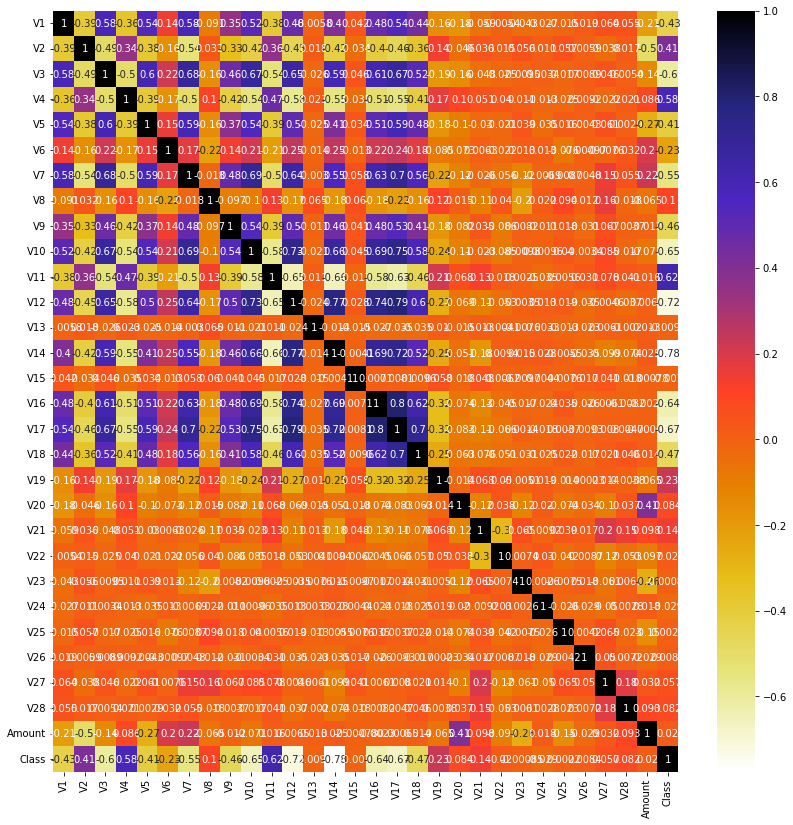

In [10]:
# Checking for Multicollinearity
plt.figure(figsize=(14,14))
sns.heatmap(data_1.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

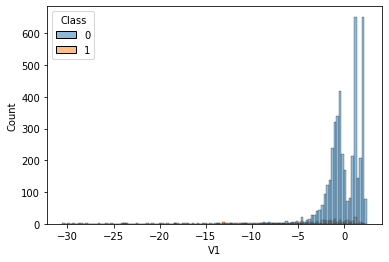

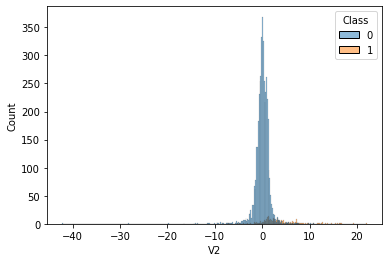

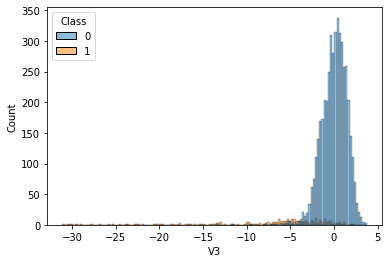

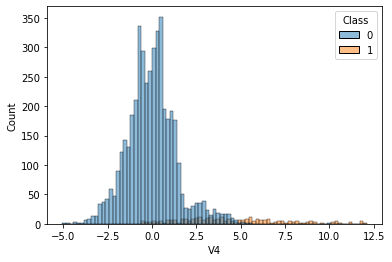

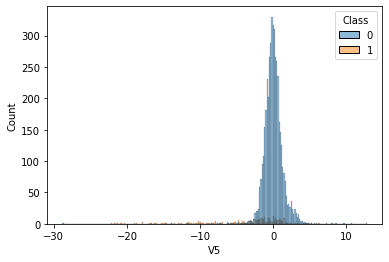

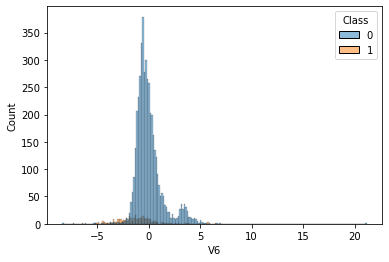

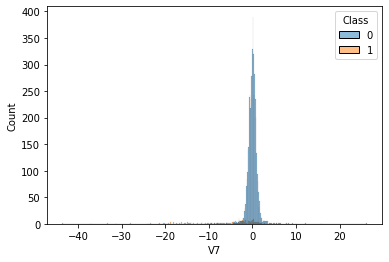

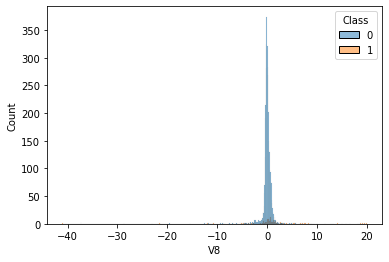

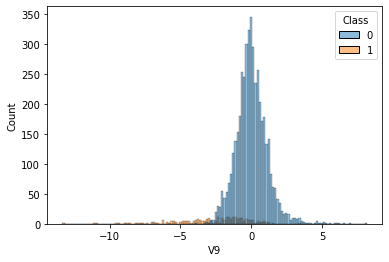

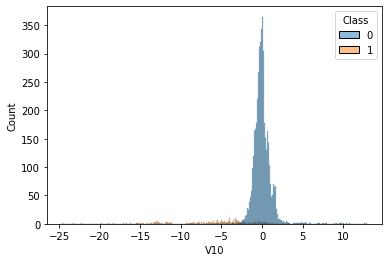

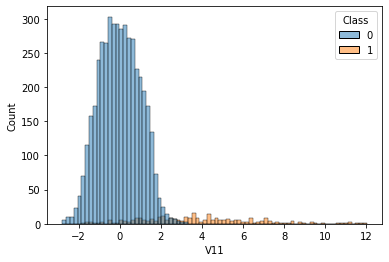

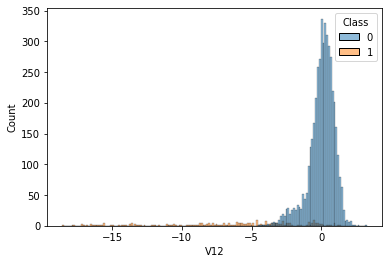

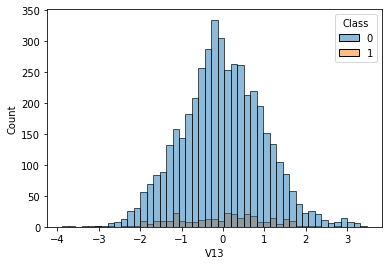

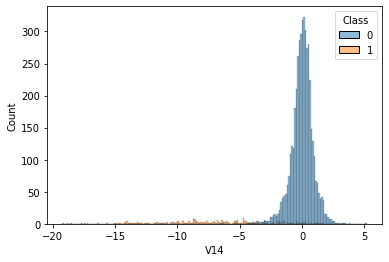

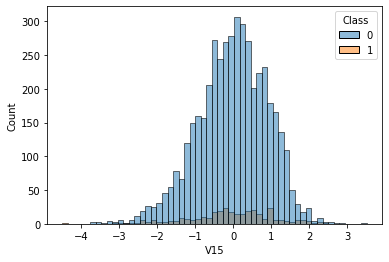

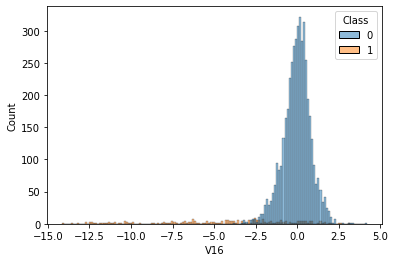

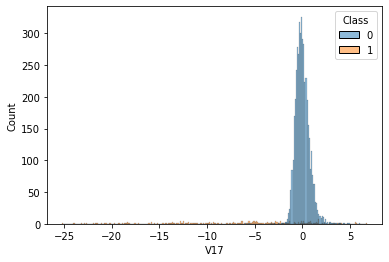

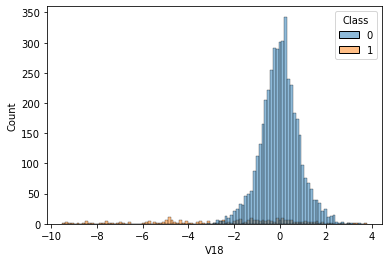

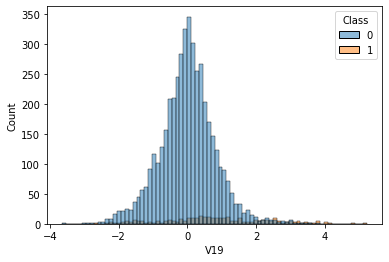

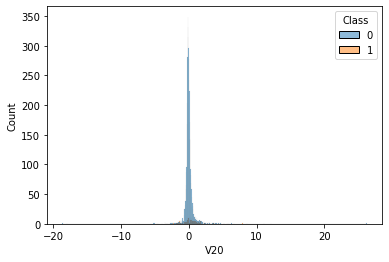

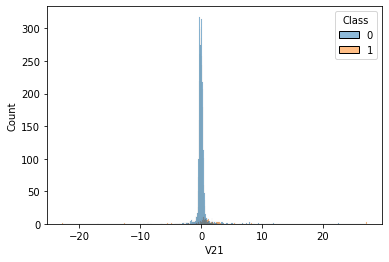

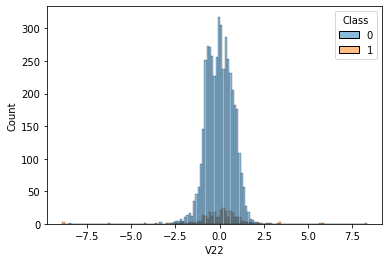

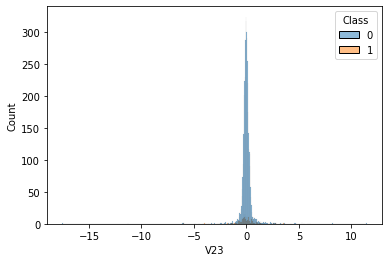

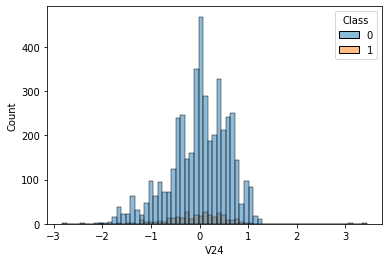

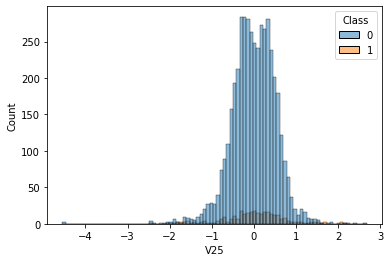

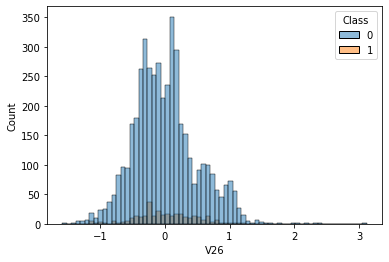

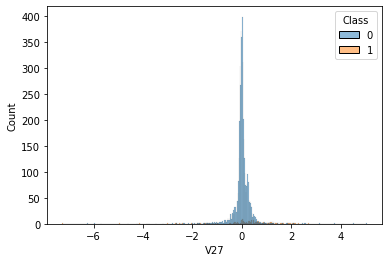

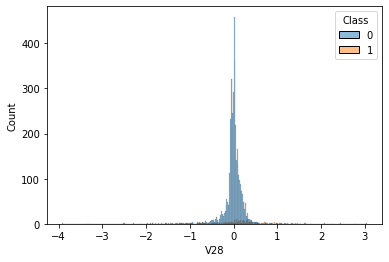

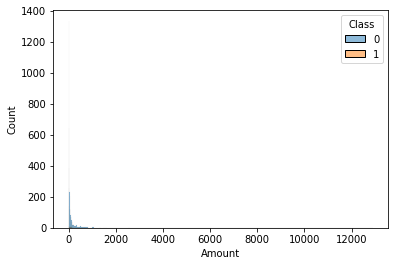

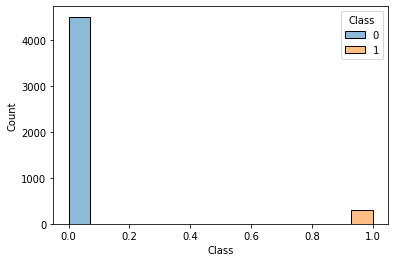

In [55]:
# Checking for features distribution 
for col in data_1.columns:
    sns.histplot(data=data_1, x=col, hue="Class")
    plt.show()

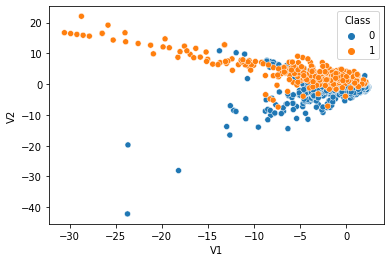

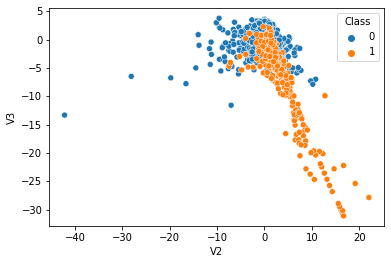

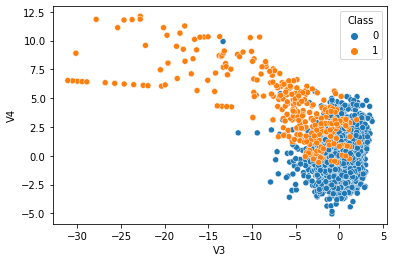

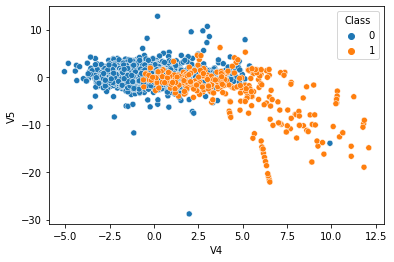

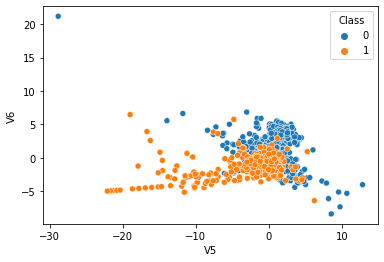

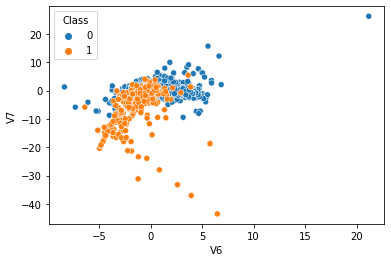

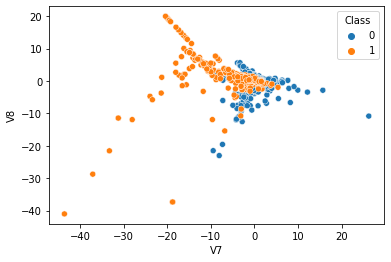

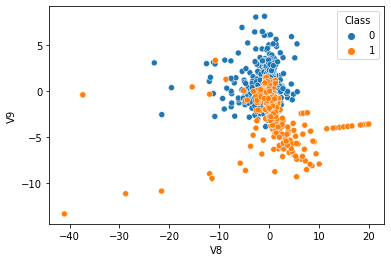

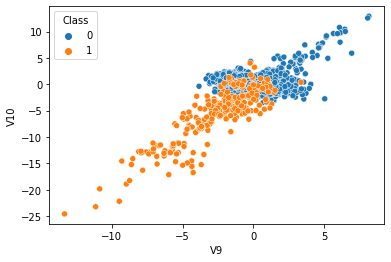

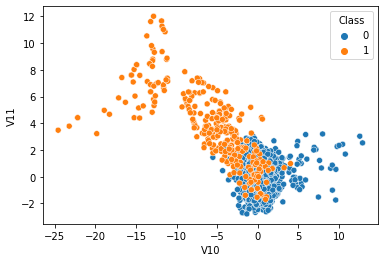

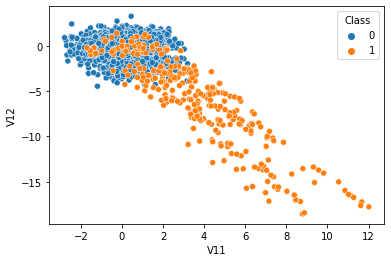

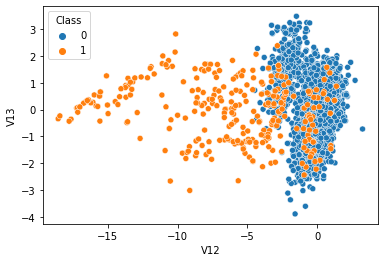

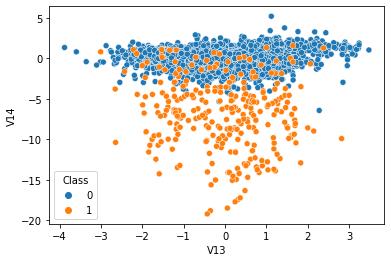

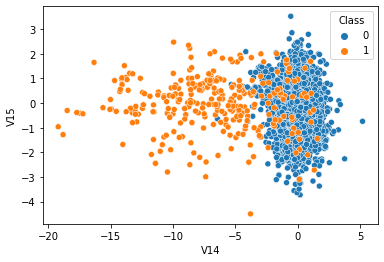

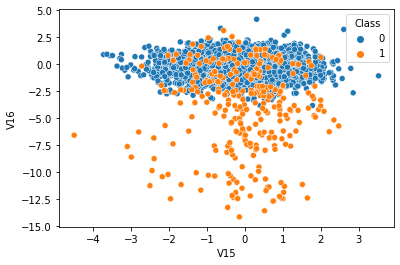

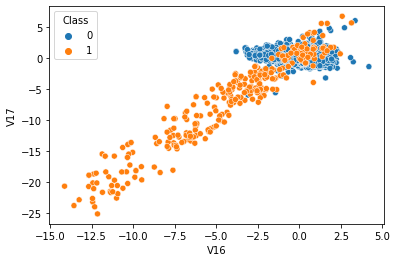

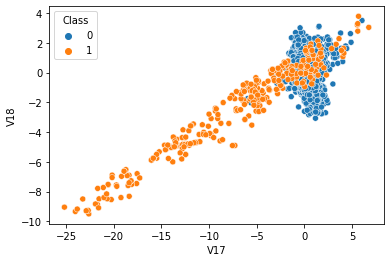

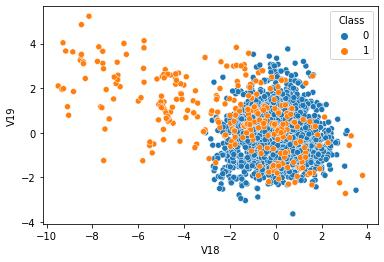

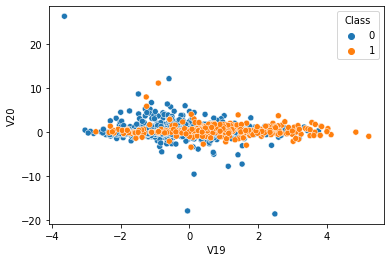

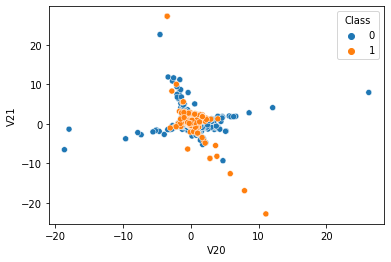

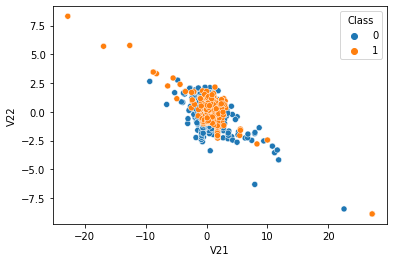

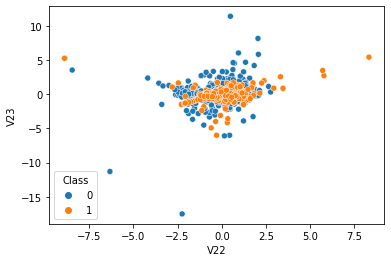

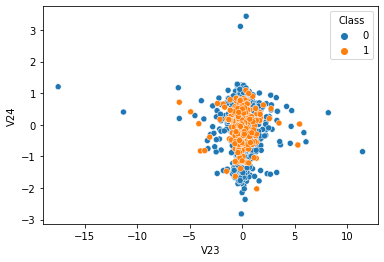

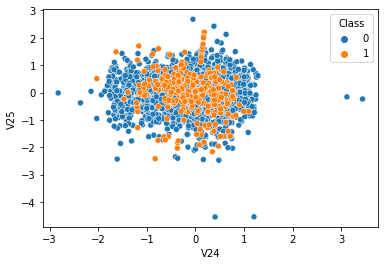

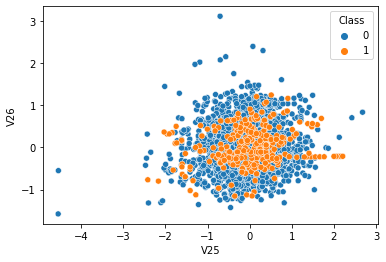

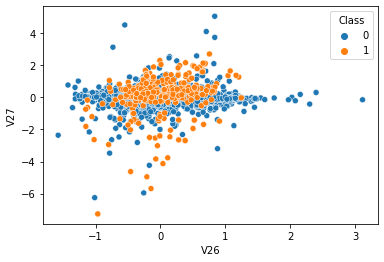

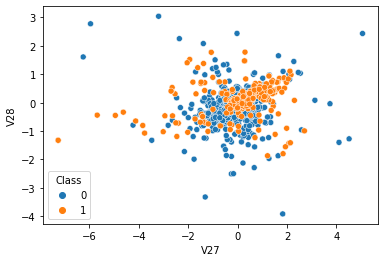

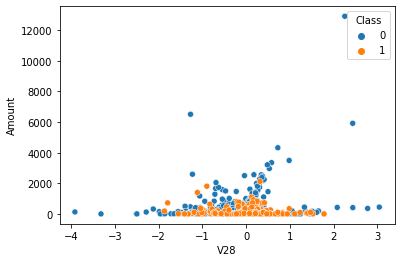

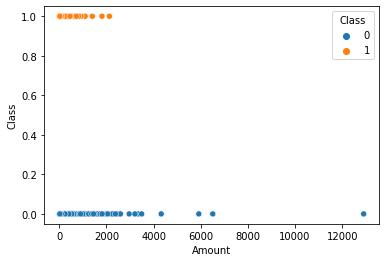

In [67]:
# Checking for Linearity 
for i in range(len(data_1.columns)-1):
    sns.scatterplot(data=data_1, x=data_1.iloc[:,i], y=data_1.iloc[:,i+1], hue="Class")
    plt.show()

### Insights

* Data doesn't affect with any Multicollinearity problem
* The majority class 0 highly dominating class 1 - **Need to be Balanced**
* Variables from v1 to v16 showed linear relationship and from v17 showed non-linear relationship

### Data Pre-Processing

In [68]:
# Checking for missing values
data_1.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

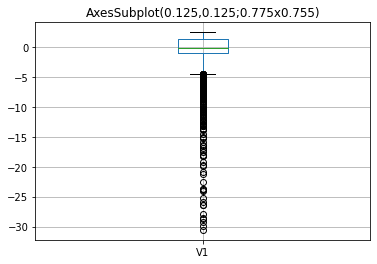

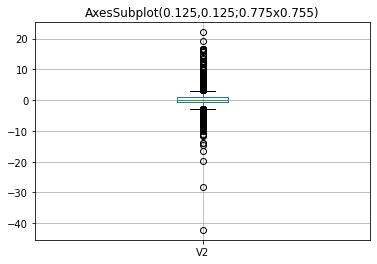

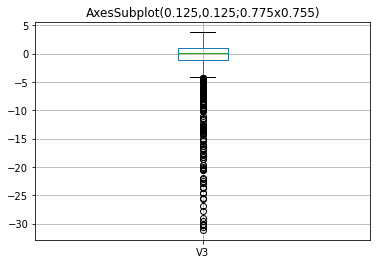

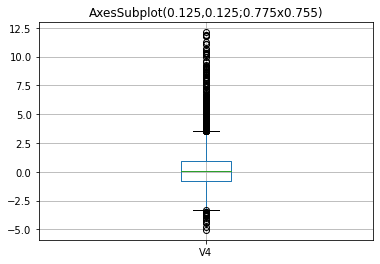

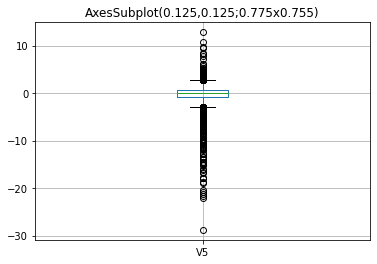

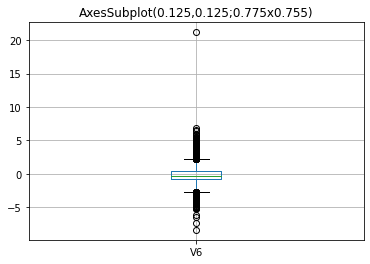

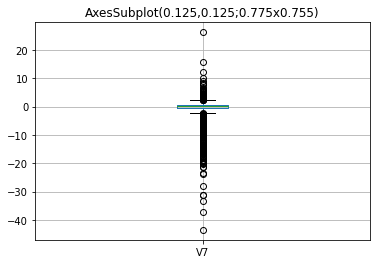

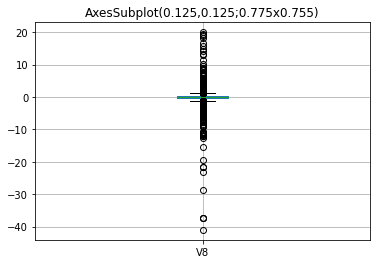

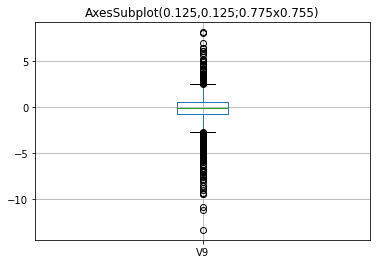

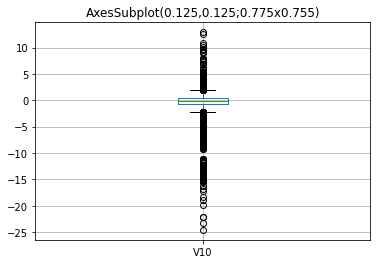

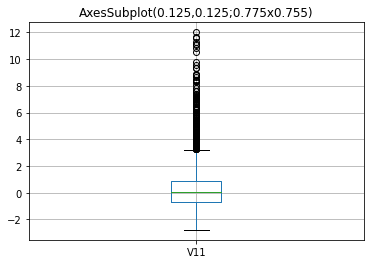

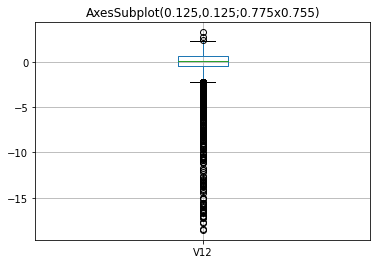

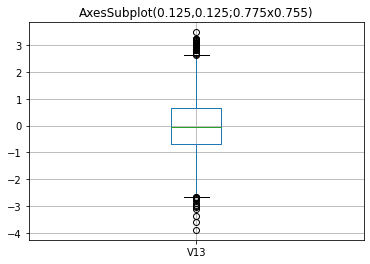

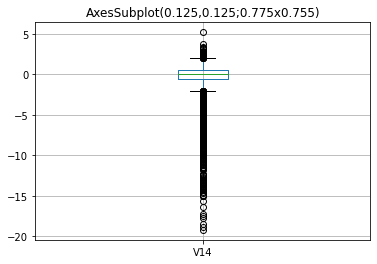

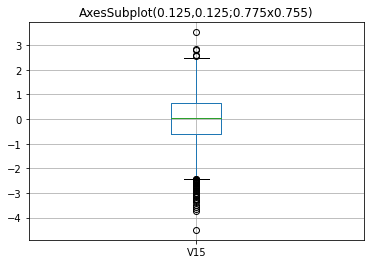

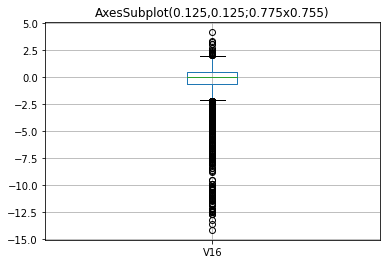

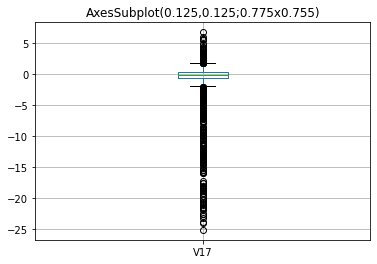

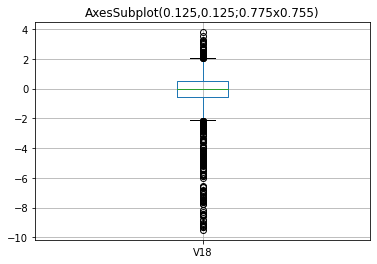

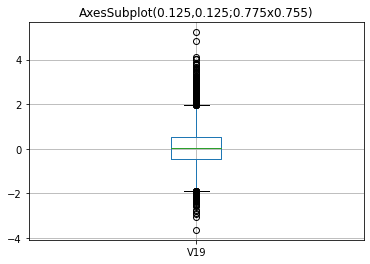

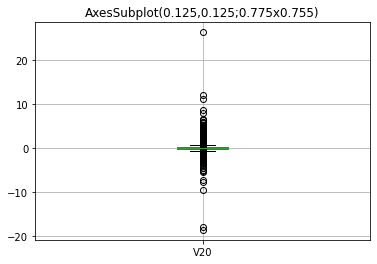

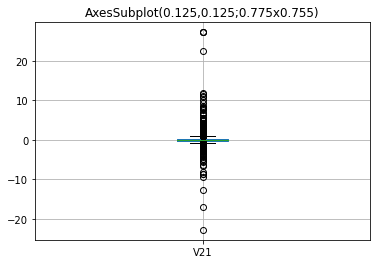

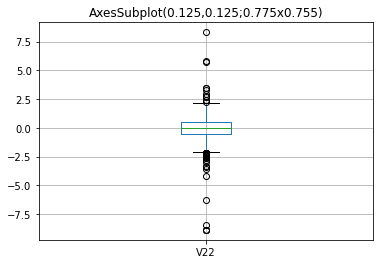

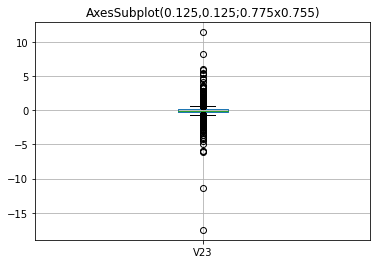

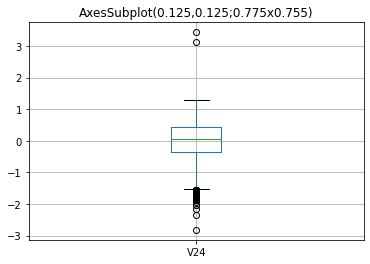

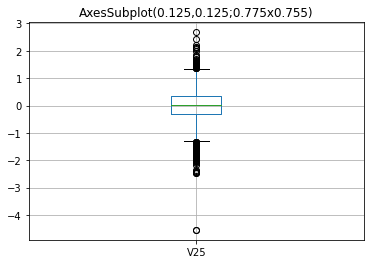

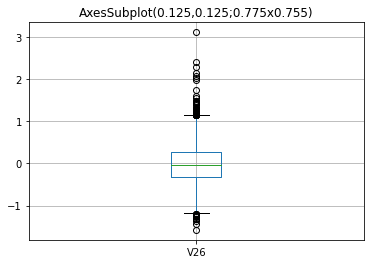

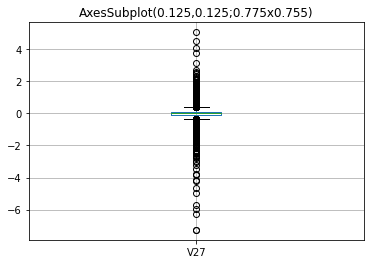

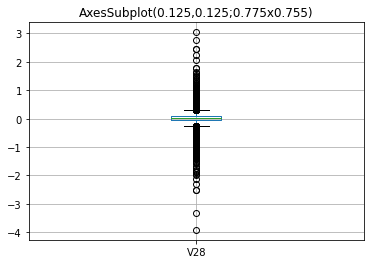

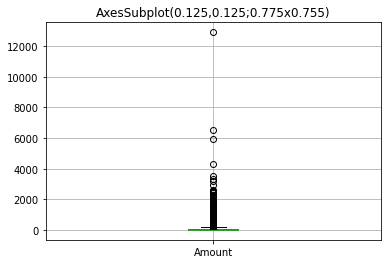

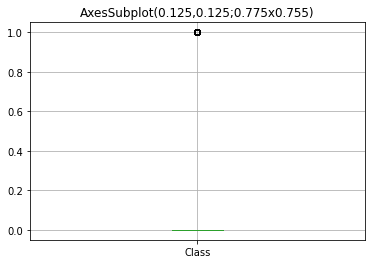

In [69]:
# Checking Outliers
var = data_1.columns
def outliers(data,var):
    num_vars=[var for var in data.columns if data[var].dtypes != 'O']
    for var in num_vars:
        images=data.boxplot(column=var) # 
        plt.title(images)
        plt.show()
outliers(data_1,var)

### Insights

* Data don't have any missing values
* From boxplots those varibales showed few outliers. However, data being scaled on negative. No need to go for outliers treatment

### Feature Engineering

In [11]:
# Feature Scaling
stnad = StandardScaler()
data_1["amount_scaled"] = stnad.fit_transform(data["Amount"].values.reshape(-1,1))
data_1.drop("Amount",axis=1,inplace=True)

In [12]:
# Defining X and y data - Dependent & Independent Variables
X = data_1.iloc[:,data_1.columns != "Class"]
y = data_1.iloc[:,data_1.columns == "Class"]
# Defning train & test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### SMOTE - Syntheic Minority Oversampling Technique

In [13]:
# Creating object
SM = SMOTE(random_state=2)
X_train_sam, y_train_sam = SM.fit_resample(X_train, y_train)

In [14]:
# Checking data is balance or not
y_train_sam.value_counts()

Class
0        3128
1        3128
dtype: int64

### Model Building

In [21]:
sv = svm.SVC(probability=True,kernel="linear",C=0.01)
sv.fit(X_train_sam, y_train_sam)  

SVC(C=0.01, kernel='linear', probability=True)

In [22]:
predicted = sv.predict(X_test)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1373
           1       0.70      0.91      0.79        68

    accuracy                           0.98      1441
   macro avg       0.85      0.95      0.89      1441
weighted avg       0.98      0.98      0.98      1441
 

Confusion matrix:
 [[1346   27]
 [   6   62]] 

AUC & ROC Curve:
 0.9460498693286491


Text(0.5, 0, 'False Positive Rate')

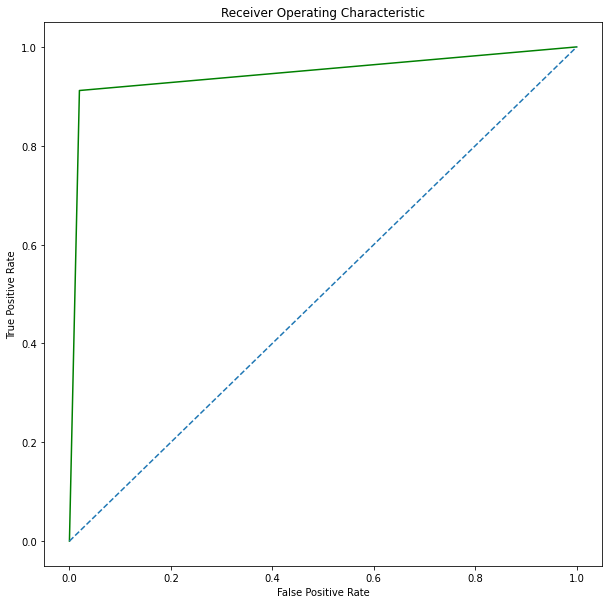

In [133]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted),"\n")
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat,"\n")
print('AUC & ROC Curve:\n',roc_auc_score(y_test, predicted))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='green')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Insights

* Model performed well for both classes eventhough it is imbalanced
* There is slight improvement requires for class 1 beacause the precision, recall and f1 score low
* SMOTE balancing method showed good results
* False Negative showed high comparitively False Positive
* Precision for label 1 low because of imbalace(synthetic data)

In [24]:
# Preparing Grid
param_grid = {'C': [0.1, 0.001], 
              'gamma': [0.1, 0.01],
              'kernel': ['rbf','linear']} 

In [25]:
grid_search_cv = GridSearchCV(estimator=sv, param_grid=param_grid)
grid_search_cv.fit(X_train_sam, y_train_sam)
y_pred_rf = grid_search_cv.predict(X_test)

In [26]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred_rf))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1373
           1       0.61      0.91      0.73        68

    accuracy                           0.97      1441
   macro avg       0.80      0.94      0.86      1441
weighted avg       0.98      0.97      0.97      1441

Confusion matrix:
 [[1333   40]
 [   6   62]]


In [27]:
# Best Parame
random_search_cv.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

### New Predictions

In [114]:
test_pre = X_test[0:10]
tru_val = y_test[0:10].values
pred = sv.predict(test_pre)
pd.DataFrame({'Actual': tru_val.flatten(), 'Predicted': pred.flatten()})

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Saving Model for Real Time Predictions

#### Pickle Serilization

In [137]:
# .sav format
filename = 'credict_ml.sav'
pickle.dump(sv, open(filename, 'wb'))

Predictions could be happen by creating it as API and to serve real time predictions

#### THE END